In [1]:
%cd /Users/shannonrae/Downloads/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/shannonrae/Downloads


# Part One: Direct Requests for Data Manipulation

## Inspect Vendor Data

In [2]:
chartmetric = pd.read_csv('chartmetric.csv')
vendor = pd.read_csv('vendor.csv')
print(chartmetric.shape)
print(vendor.shape)

(200000, 10)
(100000, 4)


In [3]:
chartmetric.head(10)

,Unnamed: 0,id,sp_monthly_listeners,ins_followers,ycs_views,sp_popularity,deezer_fans,ws_views_3days,sp_followers,timestp
0,811805,5596,47791052.0,26272791.0,3.303772e+08,100.0,326392.0,63410.0,8744309.0,2019-06-15
1,147457,296029,NaN,NaN,NaN,98.0,NaN,NaN,4.0,2019-06-15
2,811012,3380,37726653.0,58036756.0,3.662341e+08,98.0,18702032.0,217.0,37594074.0,2019-06-15
3,913574,209693,46647278.0,6541211.0,2.525443e+09,97.0,562513.0,5874.0,6767889.0,2019-06-15
4,1468,3648,60587794.0,29591733.0,1.696054e+10,97.0,13092899.0,11442.0,45390634.0,2019-06-15
5,916159,214945,35850292.0,17401823.0,4.846086e+09,96.0,517690.0,3242.0,12999092.0,2019-06-15
6,1572,3883,47841651.0,29755910.0,1.154122e+08,96.0,5950896.0,1987.0,14490869.0,2019-06-15
7,865546,113381,33437570.0,14740547.0,1.192398e+10,96.0,2011983.0,1661.0,17027766.0,2019-06-15
8,876500,135326,44233159.0,16440779.0,1.171675e+09,96.0,1237335.0,10758.0,14521904.0,2019-06-15
9,811219,3963,42279799.0,157384595.0,1.204260e+10,96.0,7207444.0,24520.0,30603071.0,2019-06-15


In [4]:
vendor.head(10)

,Unnamed: 0,rev_pot,id,timestp
0,98932,0.109,810447,"June 15, 2019"
1,56604,0.204,405733,"June 15, 2019"
2,91164,0.140,172979,"June 15, 2019"
3,17313,0.559,127280,"June 15, 2019"
4,54471,0.210,479201,"June 15, 2019"
5,45128,0.241,648092,"June 15, 2019"
6,14512,0.651,311435,"June 15, 2019"
7,69649,0.177,851055,"June 15, 2019"
8,42451,0.254,312396,"June 15, 2019"
9,86739,0.151,341372,"June 15, 2019"


In [5]:
# Number of rev_pot for each day
vendor.groupby(['timestp'])['rev_pot'].count()

timestp
June 15, 2019    50000
June 16, 2019    50000
Name: rev_pot, dtype: int64

In [6]:
# mean rev_pot for each day
vendor.groupby(['timestp'])['rev_pot'].mean()

timestp
June 15, 2019    0.564098
June 16, 2019    0.564136
Name: rev_pot, dtype: float64

In [7]:
# median rev_pot for each day
vendor.groupby(['timestp'])['rev_pot'].median()

timestp
June 15, 2019    0.226
June 16, 2019    0.226
Name: rev_pot, dtype: float64

In [8]:
# Standard deviation of rev_pot for each day
vendor.groupby(['timestp'])['rev_pot'].std()

timestp
June 15, 2019    1.974947
June 16, 2019    1.900275
Name: rev_pot, dtype: float64

In [9]:
# good check to varify 
vendor_grp = vendor.groupby(['timestp'])['rev_pot']
vendor_grp.describe()

,count,mean,std,min,25%,50%,75%,max
timestp,,,,,,,,
"June 15, 2019",50000.0,0.564098,1.974947,0.103,0.168,0.226,0.407,100.0
"June 16, 2019",50000.0,0.564136,1.900275,0.102,0.168,0.226,0.408,100.0


## Merging Data Sources together

In [10]:
# converting vendor and chartmetric timestp to datetime to merge
vendor['timestp'] = pd.to_datetime(vendor['timestp'])
chartmetric['timestp'] = chartmetric['timestp'].astype('datetime64[ns]')
# merging on outer keeps all rows
# merging left would keep all rows of Chartmetric data and merge vendor data
# to only available chartmetric data
result = pd.merge(chartmetric, vendor, on=['id','timestp'],how='outer')
chartmetric.dtypes

Unnamed: 0                       int64
id                               int64
sp_monthly_listeners           float64
ins_followers                  float64
ycs_views                      float64
sp_popularity                  float64
deezer_fans                    float64
ws_views_3days                 float64
sp_followers                   float64
timestp                 datetime64[ns]
dtype: object

In [11]:
vendor.head(10)

,Unnamed: 0,rev_pot,id,timestp
0,98932,0.109,810447,2019-06-15
1,56604,0.204,405733,2019-06-15
2,91164,0.140,172979,2019-06-15
3,17313,0.559,127280,2019-06-15
4,54471,0.210,479201,2019-06-15
5,45128,0.241,648092,2019-06-15
6,14512,0.651,311435,2019-06-15
7,69649,0.177,851055,2019-06-15
8,42451,0.254,312396,2019-06-15
9,86739,0.151,341372,2019-06-15


In [12]:
result.head(10)

,Unnamed: 0_x,id,sp_monthly_listeners,ins_followers,ycs_views,sp_popularity,deezer_fans,ws_views_3days,sp_followers,timestp,Unnamed: 0_y,rev_pot
0,811805.0,5596,47791052.0,26272791.0,3.303772e+08,100.0,326392.0,63410.0,8744309.0,2019-06-15,NaN,NaN
1,147457.0,296029,NaN,NaN,NaN,98.0,NaN,NaN,4.0,2019-06-15,NaN,NaN
2,811012.0,3380,37726653.0,58036756.0,3.662341e+08,98.0,18702032.0,217.0,37594074.0,2019-06-15,3.0,74.984
3,913574.0,209693,46647278.0,6541211.0,2.525443e+09,97.0,562513.0,5874.0,6767889.0,2019-06-15,NaN,NaN
4,1468.0,3648,60587794.0,29591733.0,1.696054e+10,97.0,13092899.0,11442.0,45390634.0,2019-06-15,0.0,100.000
5,916159.0,214945,35850292.0,17401823.0,4.846086e+09,96.0,517690.0,3242.0,12999092.0,2019-06-15,NaN,NaN
6,1572.0,3883,47841651.0,29755910.0,1.154122e+08,96.0,5950896.0,1987.0,14490869.0,2019-06-15,NaN,NaN
7,865546.0,113381,33437570.0,14740547.0,1.192398e+10,96.0,2011983.0,1661.0,17027766.0,2019-06-15,33.0,48.200
8,876500.0,135326,44233159.0,16440779.0,1.171675e+09,96.0,1237335.0,10758.0,14521904.0,2019-06-15,NaN,NaN
9,811219.0,3963,42279799.0,157384595.0,1.204260e+10,96.0,7207444.0,24520.0,30603071.0,2019-06-15,2.0,82.785


In [13]:
# gives row length by column length
result.shape

(237729, 12)

## Initial Glance at Combined Data

In [14]:
# Merging on common data
common_results = pd.merge(chartmetric, vendor, 
                         on=['id','timestp'],
                         how='inner')
common_results.rev_pot.count()

62271

In [15]:
# Revenue potentials of 10 artists with top Wikipedia Views
Wiki = common_results.sort_values(by='ws_views_3days', ascending=False)
Wiki_rev_pot = Wiki[['id','ws_views_3days','rev_pot']].reset_index()
Wiki_rev_pot.head(10)

,index,id,ws_views_3days,rev_pot
0,59,87,68023.0,28.850
1,32379,202811,64479.0,9.829
2,1078,202811,63410.0,9.829
3,36174,322118,63178.0,4.165
4,27906,206397,61195.0,6.803
5,31480,4047,47219.0,8.408
6,28120,488594,46076.0,3.658
7,59009,488594,45857.0,3.658
8,58697,473036,44907.0,2.597
9,2755,741890,39792.0,9.649


In [16]:
# Visualization of above average youtube views and below average youtube views
# caluclating average youtube views
avg_youtube = common_results.ycs_views.mean()
print(avg_youtube)

68738339.10032132


In [17]:
above_avg = common_results['ycs_views'] >= avg_youtube
below_avg = common_results['ycs_views'] < avg_youtube

above_youtube = common_results[above_avg]
above_youtube = above_youtube.sort_values(by='ycs_views',ascending=False)
above_youtube = above_youtube.dropna()
a_youtube_rev_pot = above_youtube.rev_pot.mean()
below_youtube = common_results[below_avg]
below_youtube = below_youtube.sort_values(by='ycs_views',ascending=False)
below_youtube = below_youtube.dropna()
b_youtube_rev_pot = below_youtube.rev_pot.mean()
print(a_youtube_rev_pot)
print(b_youtube_rev_pot)
print(above_youtube.shape)

5.072048063462432
0.9005602963240846
(2143, 12)


In [18]:
x = np.array([0,10,20,30,40,50,60,70,80,90,100])
bins = pd.cut(above_youtube['rev_pot'],x)
above_grp = above_youtube.groupby(bins)['rev_pot'].agg(['mean','count']).reset_index()

binsb = pd.cut(below_youtube['rev_pot'],x)
below_grp = below_youtube.groupby(binsb)['rev_pot'].agg(['mean','count']).reset_index()

above_grp.shape

(10, 3)

In [19]:
above_grp

,rev_pot,mean,count
0,"(0, 10]",2.342300,1872
1,"(10, 20]",13.685073,150
2,"(20, 30]",24.386435,62
3,"(30, 40]",34.205059,17
4,"(40, 50]",44.411833,18
5,"(50, 60]",54.972500,14
6,"(60, 70]",60.770333,3
7,"(70, 80]",72.228667,3
8,"(80, 90]",85.191500,2
9,"(90, 100]",100.000000,2


In [20]:
below_grp

,rev_pot,mean,count
0,"(0, 10]",0.776128,10593
1,"(10, 20]",12.805061,49
2,"(20, 30]",23.845091,11
3,"(30, 40]",35.240500,4
4,"(40, 50]",45.492000,5
5,"(50, 60]",52.096000,1
6,"(60, 70]",NaN,0
7,"(70, 80]",71.785000,1
8,"(80, 90]",NaN,0
9,"(90, 100]",NaN,0


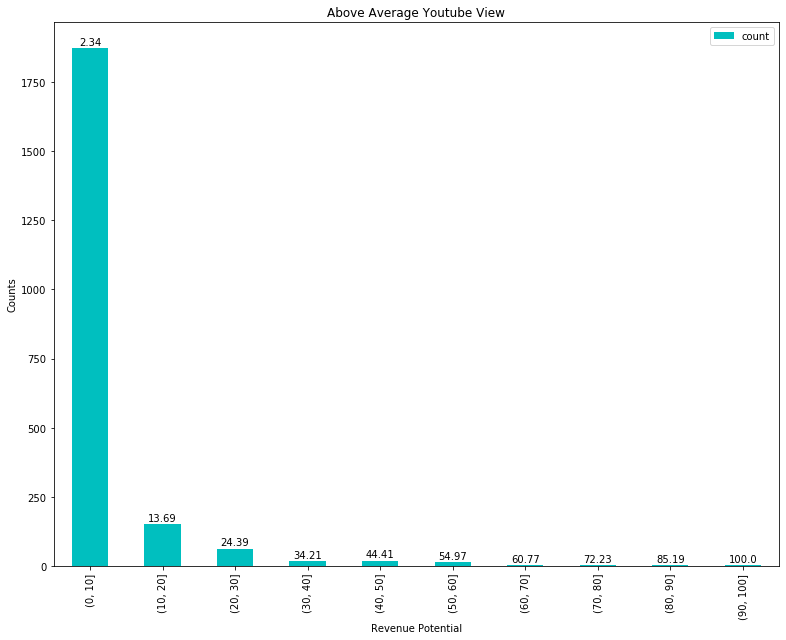

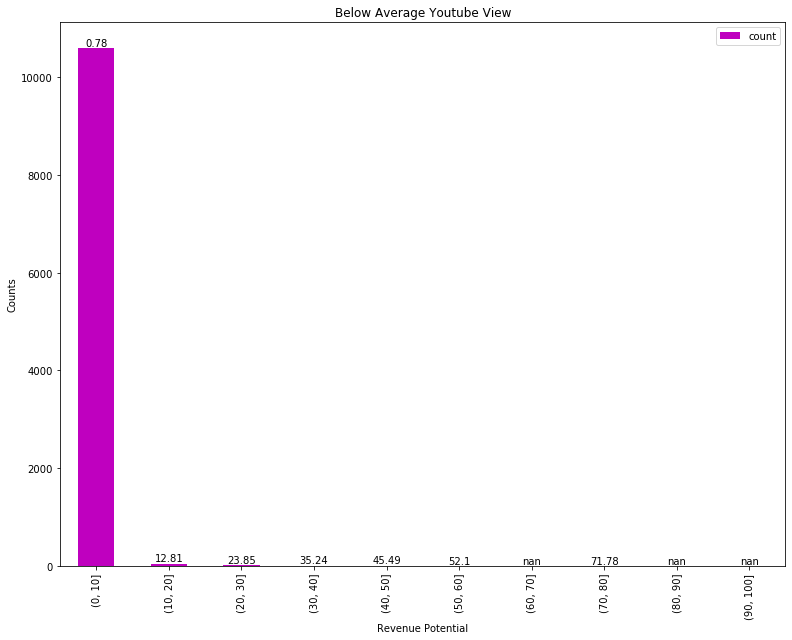

In [21]:
ax = above_grp.plot.bar(x='rev_pot',y='count',color='c',figsize=(13,10))
rects = ax.patches

# Make some labels.
labels = round(above_grp['mean'],2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.title('Above Average Youtube View')
plt.xlabel('Revenue Potential')
plt.ylabel('Counts')


ax = below_grp.plot.bar(x='rev_pot',y='count',color='m',figsize=(13,10))

rects = ax.patches
# Make some labels.
labels = round(below_grp['mean'],2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.title('Below Average Youtube View')
plt.xlabel('Revenue Potential')
plt.ylabel('Counts')

plt.show()

# Part Two: Open-Ended Data Science Task

In [22]:
common_results = common_results.sort_values(by='rev_pot',ascending = True)
common_results.head()

,Unnamed: 0_x,id,sp_monthly_listeners,ins_followers,ycs_views,sp_popularity,deezer_fans,ws_views_3days,sp_followers,timestp,Unnamed: 0_y,rev_pot
53618,371426,744232,72354.0,252.0,NaN,37.0,732.0,17.0,1144.0,2019-06-16,99999,0.102
28690,552697,1106949,38731.0,NaN,NaN,32.0,12.0,NaN,944.0,2019-06-15,99979,0.103
50161,74611,150639,72014.0,NaN,NaN,40.0,93.0,12.0,3349.0,2019-06-16,99846,0.103
20011,843120,68447,38179.0,389816.0,NaN,39.0,2355.0,5.0,14178.0,2019-06-15,99869,0.103
50020,1020612,424423,55375.0,12953.0,NaN,40.0,11246.0,176.0,10238.0,2019-06-16,99945,0.103


In [23]:
from scipy.stats import pearsonr
from numpy import cov

In [24]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.sp_monthly_listeners)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: nan


In [25]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.ins_followers)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: nan


In [26]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.ycs_views)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: nan


In [27]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.sp_popularity)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.511


In [28]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.deezer_fans)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: nan


In [29]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.ws_views_3days)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: nan


In [30]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.sp_followers)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.839


Upon doing the Pearson Correlation for each of the column variables, we find that the Predicted Revenue Potential is based off of only Spotify Popularity and Spotify Followers therfore making all of the other Chartmetric variables not applicable to the vendor dataset of Revenue Potential.

Now lets try it with getting rid of all of the NAN values and see it there is a significant difference.

In [31]:
common_results = common_results.dropna()
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.sp_monthly_listeners)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.977


In [32]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.ins_followers)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.612


In [33]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.ycs_views)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.571


In [34]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.sp_popularity)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.564


In [35]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.deezer_fans)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.786


In [36]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.ws_views_3days)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.466


In [37]:
corr,_ = pearsonr(common_results.rev_pot,
                  common_results.sp_followers)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.890


After dropping all the NAN values you can see that all the Chartmetric variables are significant except the average number of times an artist is looked up on Wikipedia with a value 0.466, just under 0.5. The interesting part is now the most significant correlation is the number of Spotify monthy Listeners with a value of 0.977 where as before the NAN values were dropped that variable was insignificant. The second highest correlation variable number of Spotify Followers was the most significant variable without dropping NAN values. This means that in general (for both datasets) this is the most significant variable.

In [38]:
# estimating artists without revenue potential score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
# split into training and testing sets
# Im only using these two predictors because Im using the data will predict the NAN
# values.
result.sp_followers = result.sp_followers.fillna(result.sp_followers.mean())
result.sp_popularity = result.sp_popularity.fillna(result.sp_popularity.mean())
# print(result)
notnans = result['rev_pot'].notnull()#.all(axis='columns')

result_notnans = result[notnans]
# print(result_notnans)
predictors = result_notnans[['sp_followers', 'sp_popularity']]


# predictors = result_notnans[['sp_followers', 'sp_popularity','ws_views_3days',
#                             'deezer_fans','ycs_views','ins_followers','sp_monthly_listeners']]

targets = result_notnans.rev_pot
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors,
                                                              targets, test_size = .2,
                                                             random_state=1)

print(pred_train.shape)
print(pred_test.shape)
print(tar_train.shape)
print(tar_test.shape)

(80000, 2)
(20000, 2)
(80000,)
(20000,)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
# build model on training data

regressor = DecisionTreeRegressor(random_state=0)
regressor = regressor.fit(pred_train, tar_train)

predictions = regressor.predict(pred_test)

sklearn.metrics.r2_score(tar_test, predictions)

0.8496695260669376

The DecisionTreeRegressor has just under 85% correct prediction score.

In [40]:
# predicting the NAN rows
df_nans = result.loc[~notnans].copy()
df_nans['rev_pot'] = regressor.predict(df_nans[['sp_followers','sp_popularity']])
df_nans

,Unnamed: 0_x,id,sp_monthly_listeners,ins_followers,ycs_views,sp_popularity,deezer_fans,ws_views_3days,sp_followers,timestp,Unnamed: 0_y,rev_pot
0,811805.0,5596,47791052.0,26272791.0,3.303772e+08,100.0,326392.0,63410.0,8744309.0,2019-06-15,NaN,55.0480
1,147457.0,296029,NaN,NaN,NaN,98.0,NaN,NaN,4.0,2019-06-15,NaN,34.8180
3,913574.0,209693,46647278.0,6541211.0,2.525443e+09,97.0,562513.0,5874.0,6767889.0,2019-06-15,NaN,55.0480
5,916159.0,214945,35850292.0,17401823.0,4.846086e+09,96.0,517690.0,3242.0,12999092.0,2019-06-15,NaN,48.2430
6,1572.0,3883,47841651.0,29755910.0,1.154122e+08,96.0,5950896.0,1987.0,14490869.0,2019-06-15,NaN,48.2430
8,876500.0,135326,44233159.0,16440779.0,1.171675e+09,96.0,1237335.0,10758.0,14521904.0,2019-06-15,NaN,48.2430
10,1326538.0,1036281,NaN,NaN,NaN,96.0,NaN,NaN,0.0,2019-06-15,NaN,64.3180
12,115.0,236,29307314.0,25769749.0,1.323173e+10,95.0,12044537.0,13456.0,27258228.0,2019-06-15,NaN,55.9230
14,1700.0,4215,31635644.0,17184640.0,NaN,95.0,374373.0,67.0,5753847.0,2019-06-15,NaN,28.7210
16,1043494.0,470066,NaN,NaN,NaN,95.0,NaN,NaN,0.0,2019-06-15,NaN,64.3180


In [41]:
# Build model on training data
regressor_f = RandomForestRegressor(n_estimators = 25,random_state=0)
regressor_f = regressor_f.fit(pred_train, tar_train)

predictions_f = regressor_f.predict(pred_test)

# sklearn.metrics.confusion_matrix(tar_test, predictions_f)
sklearn.metrics.r2_score(tar_test, predictions_f)

0.9026365015962481

In [42]:
# predicting the NAN rows
df_nans = result.loc[~notnans].copy()
df_nans['rev_pot'] = regressor_f.predict(df_nans[['sp_followers','sp_popularity']])
df_nans

,Unnamed: 0_x,id,sp_monthly_listeners,ins_followers,ycs_views,sp_popularity,deezer_fans,ws_views_3days,sp_followers,timestp,Unnamed: 0_y,rev_pot
0,811805.0,5596,47791052.0,26272791.0,3.303772e+08,100.0,326392.0,63410.0,8744309.0,2019-06-15,NaN,50.036280
1,147457.0,296029,NaN,NaN,NaN,98.0,NaN,NaN,4.0,2019-06-15,NaN,53.120560
3,913574.0,209693,46647278.0,6541211.0,2.525443e+09,97.0,562513.0,5874.0,6767889.0,2019-06-15,NaN,52.837800
5,916159.0,214945,35850292.0,17401823.0,4.846086e+09,96.0,517690.0,3242.0,12999092.0,2019-06-15,NaN,50.667320
6,1572.0,3883,47841651.0,29755910.0,1.154122e+08,96.0,5950896.0,1987.0,14490869.0,2019-06-15,NaN,51.365080
8,876500.0,135326,44233159.0,16440779.0,1.171675e+09,96.0,1237335.0,10758.0,14521904.0,2019-06-15,NaN,51.365080
10,1326538.0,1036281,NaN,NaN,NaN,96.0,NaN,NaN,0.0,2019-06-15,NaN,55.996920
12,115.0,236,29307314.0,25769749.0,1.323173e+10,95.0,12044537.0,13456.0,27258228.0,2019-06-15,NaN,67.382920
14,1700.0,4215,31635644.0,17184640.0,NaN,95.0,374373.0,67.0,5753847.0,2019-06-15,NaN,46.101600
16,1043494.0,470066,NaN,NaN,NaN,95.0,NaN,NaN,0.0,2019-06-15,NaN,55.996920


The RandomForestClassifier has just a hair over 90% correct prediction score making it the better model of the two models in predicting the Revenue Potential of an Artist.

In [43]:
# fit on extra trees model to the data
model_f = ExtraTreesRegressor()
model_f.fit(pred_train, tar_train)

# displaying the relative importance of each attribute
print(model_f.feature_importances_)


[0.49516901 0.50483099]


This means that Spotify Popularity is the most important feature in this model for predicting Revenue Potential.

Using a RandomForestRegressor has its advantages those being it is highly accurate and does not suffer from overfitting. It also returns the relative feature importance which helps in narrowing down the model. I had already done something similar to this using the Pearson Correlation to narrow down my models predictions features. The disadvantage to the RandomForestRegressor is that it can be time consuming for larger datasets.